## Mutual information

The mutual information measures the reduction in uncertainty in variable A when variable B is known. 

To select variables, we are interested in the mutual information between the predictor variables and the target. Higher mutual information values, indicate little uncertainty about the target Y given the predictor X.

[Mutual Information, Wikipedia](https://en.wikipedia.org/wiki/Mutual_information):

Using Scikit-learn, we can determine the mutual information between a variable and the target using the mutual_info_classif or mutual_info_regression for binary or continuous targets.

In [116]:
import sys
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# to obtain the mutual information values
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

# to select the features
from sklearn.feature_selection import SelectKBest, SelectPercentile

# setting path
sys.path.append('..')
# importing
from helper_fe_v2 import get_full_datapath_nm, read_df_from_file, check_module_members

In [117]:
pkg, func = check_module_members ('helper_fe_v2', os.getenv('BASEPROJDIR'))
print ("func_keys ", func.keys())
print ("\n \n dir  on pkg ", dir(pkg))

func_keys  dict_keys(['check_module_members', 'chk_remove_images', 'convert_images_to_pdf', 'generate_filename', 'get_current_time', 'get_full_datapath_nm', 'get_list_of_files', 'output_show', 'read_df_from_file'])

 
 dir  on pkg  ['Path', 'PureWindowsPath', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'argparse', 'check_module_members', 'chk_remove_images', 'convert_images_to_pdf', 'generate_filename', 'get_current_time', 'get_full_datapath_nm', 'get_list_of_files', 'getopt', 'img2pdf', 'importlib', 'inspect', 'os', 'output_show', 'pd', 'read_df_from_file', 'sys', 'time', 'uuid']


In [118]:
# use inspect to do he same
import inspect
# setting path
sys.path.append('..')
# importing
import helper_fe_v2

name_func_tuples = inspect.getmembers(helper_fe_v2, inspect.isfunction)
functions = dict(name_func_tuples)

functions.keys()

dict_keys(['check_module_members', 'chk_remove_images', 'convert_images_to_pdf', 'generate_filename', 'get_current_time', 'get_full_datapath_nm', 'get_list_of_files', 'output_show', 'read_df_from_file'])

## Classification

In [119]:
data = read_df_from_file ( "fselect_dataset_2.csv", set_nrows=False, nrws=0 ) 
data.shape

Full path NM exists  C:\Users\Arindam Banerji\CopyFolder\IOT_thoughts\python-projects\kaggle_experiments\input_data\fselect_dataset_2.csv


(50000, 109)

In [120]:
data.head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109
0,4.532710,3.280834,17.982476,4.404259,2.349910,0.603264,2.784655,0.323146,12.009691,0.139346,...,2.079066,6.748819,2.941445,18.360496,17.726613,7.774031,1.473441,1.973832,0.976806,2.541417
1,5.821374,12.098722,13.309151,4.125599,1.045386,1.832035,1.833494,0.709090,8.652883,0.102757,...,2.479789,7.795290,3.557890,17.383378,15.193423,8.263673,1.878108,0.567939,1.018818,1.416433
2,1.938776,7.952752,0.972671,3.459267,1.935782,0.621463,2.338139,0.344948,9.937850,11.691283,...,1.861487,6.130886,3.401064,15.850471,14.620599,6.849776,1.098210,1.959183,1.575493,1.857893
3,6.020690,9.900544,17.869637,4.366715,1.973693,2.026012,2.853025,0.674847,11.816859,0.011151,...,1.340944,7.240058,2.417235,15.194609,13.553772,7.229971,0.835158,2.234482,0.946170,2.700606
4,3.909506,10.576516,0.934191,3.419572,1.871438,3.340811,1.868282,0.439865,13.585620,1.153366,...,2.738095,6.565509,4.341414,15.893832,11.929787,6.954033,1.853364,0.511027,2.599562,0.811364


In [121]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),
    data['target'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((35000, 108), (15000, 108))

In [122]:
# calculate the mutual information between the variables and the target

# the smaller the value of the mi, the less information we can infer from
# the feature about the target

mi = mutual_info_classif(X_train, y_train)
mi

array([0.00000000e+00, 3.60355389e-03, 0.00000000e+00, 9.55185786e-04,
       3.91007392e-04, 5.18783215e-03, 4.94161349e-03, 2.70742649e-03,
       0.00000000e+00, 1.56650059e-04, 7.68345276e-04, 7.96321093e-04,
       7.30415298e-04, 5.03367958e-03, 0.00000000e+00, 1.05534017e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.97314147e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.41666442e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.59598367e-03, 1.50573185e-03, 0.00000000e+00, 0.00000000e+00,
       4.60279270e-03, 1.69250786e-02, 0.00000000e+00, 2.12190961e-03,
       0.00000000e+00, 1.71834960e-03, 4.53831894e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.03177515e-04, 3.17657432e-03,
       1.01066205e-03, 2.18278350e-03, 0.00000000e+00, 5.80390538e-03,
       0.00000000e+00, 5.83040300e-04, 0.00000000e+00, 2.94330561e-03,
       0.00000000e+00, 3.37493252e-03, 4.07460872e-02, 1.60046710e-03,
      

Text(0, 0.5, 'Mutual Information')

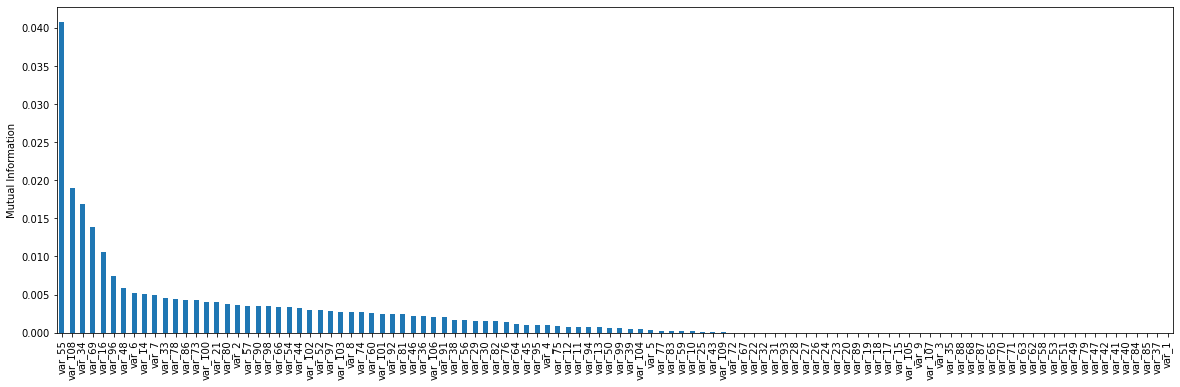

In [123]:
# 1) let's capture the above array in a pandas series
# 2)add the variable names in the index
# 3) sort the features based on their mutual information value
# 4) and make a var plot

mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False).plot.bar(figsize=(20, 6))
plt.ylabel('Mutual Information')

There are a few features (left of the plot) with higher mutual information values. There are also features with almost zero MI values on the right of the plot.

Once we find the mutual information values, to select features we need to determine a threshold, or cut-off value, above which a feature will be selected.

There are a few ways in which this can be done:

- Select top k features, where k is an arbitrary number of features

- Select features in the top n percentile, where n is again an arbitrary number

- Select all features above a certain threshold of MI, arbitrarily decided.

Scikit-learn transformer **SelectKBest**, allows us to automatically select the top k features, based of any statistical value, including the MI.

Sklearn's **SelectPercentile** allows us to select the features in the top percentile of any statistical value, including the MI.

Alternatively, if we want to select features based on a MI threshold, we can do it manually.

### Select top k features based on MI

In [124]:
# here we will select the top 10 features
# based on their mutual information value

# select features
sel_ = SelectKBest(mutual_info_classif, k=10).fit(X_train, y_train)

# display features
X_train.columns[sel_.get_support()]

Index(['var_6', 'var_7', 'var_14', 'var_16', 'var_34', 'var_48', 'var_55',
       'var_69', 'var_96', 'var_108'],
      dtype='object')

In [125]:
# to remove the rest of the features:

X_train = sel_.transform(X_train)
X_test = sel_.transform(X_test)

## Regression

In [126]:
data = read_df_from_file ( "housing_prices_train.csv", set_nrows=False, nrws=0 ) 
data.shape

Full path NM exists  C:\Users\Arindam Banerji\CopyFolder\IOT_thoughts\python-projects\kaggle_experiments\input_data\housing_prices_train.csv


(1460, 81)

In [127]:
# In practice, feature selection should be done after data pre-processing,
# so ideally, all the categorical variables are encoded into numbers,
# and then you can assess how deterministic they are of the target

# here for simplicity I will use only numerical variables
# select numerical columns:

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape

(1460, 38)

In [128]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['SalePrice'], axis=1),
    data['SalePrice'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((1022, 37), (438, 37))

In [129]:
## fill missing values

X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

### Determine Mutual Information

Text(0, 0.5, 'Mutual Information')

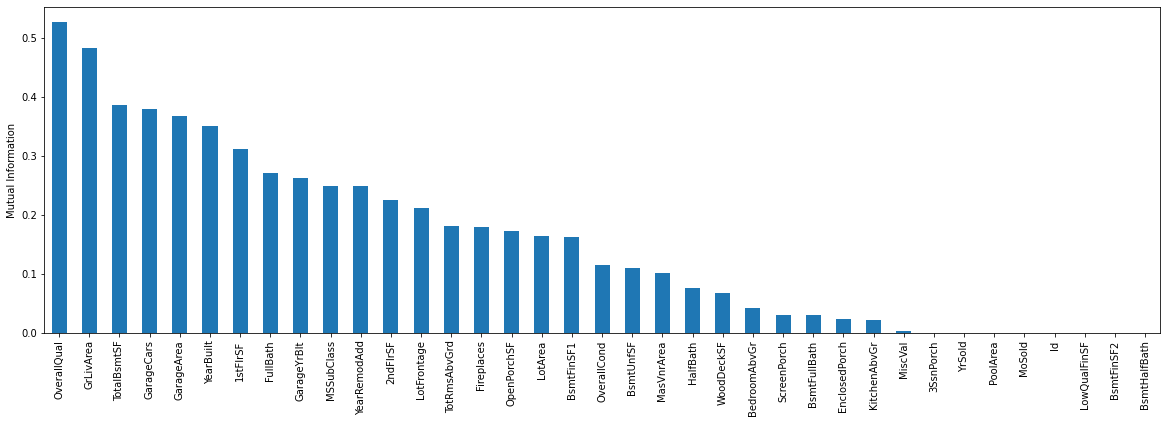

In [130]:
# determine the mutual information
mi = mutual_info_regression(X_train, y_train)

# and make a bar  plot
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False).plot.bar(figsize=(20,6))
plt.ylabel('Mutual Information')

In [131]:
# Select the features in the top percentile
sel_ = SelectPercentile(mutual_info_regression, percentile=10).fit(X_train, y_train)

# display the features
X_train.columns[sel_.get_support()]

Index(['OverallQual', 'TotalBsmtSF', 'GrLivArea', 'GarageArea'], dtype='object')

In [132]:
# to remove the rest of the features:

X_train = sel_.transform(X_train)
X_test = sel_.transform(X_test)

X_train

array([[   7., 1057., 2034.,  645.],
       [   6., 1291., 1291.,  431.],
       [   5.,  858.,  858.,    0.],
       ...,
       [   6.,    0., 1902.,  539.],
       [   7., 1374., 1557.,  420.],
       [   7., 1195., 1839.,  486.]])

## Chi-square

Compute chi-squared test between categorical features and classification target.

$$X^2 = \sum_{}^{}\frac{(observed — expected)^2}{expected}$$

In [133]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [134]:
variables = ['Pclass', 'Survived', 'Sex', 'SibSp', 'Parch', 'Embarked']

data_t = pd.read_csv("../../input_data/titanic-train.csv", usecols=variables)

data_t.columns

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'], dtype='object')

In [135]:
data_t.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked
0,0,3,male,1,0,S
1,1,1,female,1,0,C
2,1,3,female,0,0,S
3,1,1,female,1,0,S
4,0,3,male,0,0,S


In [136]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data_t.drop("Survived", axis=1),
    data_t['Survived'],
    test_size=0.3,
    random_state=0,
)

X_train.shape, X_test.shape

((623, 5), (268, 5))

In [137]:
# contingency table for gender

c = pd.crosstab(y_train, X_train['Sex'])

c

Sex,female,male
Survived,,
0,53,328
1,162,80


In [138]:
chi2_contingency(c)

(181.82121569538316,
 1.9399290790723904e-41,
 1,
 array([[131.4847512, 249.5152488],
        [ 83.5152488, 158.4847512]]))

In [139]:
# To rank all features

chi_ls = []

for feature in X_train.columns:
    
    # create contingency table
    c = pd.crosstab(y_train, X_train[feature])
    
    # chi_test
    p_value = chi2_contingency(c)[1]
    chi_ls.append(p_value)

Text(0.5, 1.0, 'Feature importance based on chi-square test')

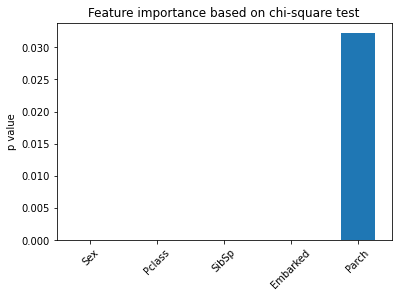

In [140]:
pd.Series(chi_ls, index=X_train.columns).sort_values(ascending=True).plot.bar(rot=45)
plt.ylabel('p value')
plt.title('Feature importance based on chi-square test')

In [141]:
# select top 3

selected = pd.Series(chi_ls, index=X_train.columns).sort_values(
    ascending=True)[0:3].index

selected

Index(['Sex', 'Pclass', 'SibSp'], dtype='object')

In [142]:
# sklearn returns numpy arrays. Convert to dataframe

X_train = X_train[selected]
X_test = X_test[selected]

X_train.head()

,Sex,Pclass,SibSp
857,male,1,0
52,female,1,1
386,male,3,5
124,male,1,0
578,female,3,1


## Univariate feature selection

Univariate feature selection works by selecting the best features based on univariate statistical tests (ANOVA). The methods estimate the degree of linear dependency between two random variables. In this case, any of the predictor variables and the target. 

ANOVA assumes a linear relationship between the feature and the target and that the variables follow a Gaussian distribution. If this is not true, the result of this test may not be useful.

These may not always be the case for the variables in your dataset, so if looking to implement these procedure, you will need to corroborate these assumptions.

I will demonstrate how to select features based on univariate tests using sklearn with a regression and classification dataset.

For the sake of the demonstration, I will assume that the variables show a linear relationship with the target and that they are normally distributed.

In [143]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# to determine the p-values with anova
from sklearn.feature_selection import f_classif, f_regression

# to select features
from sklearn.feature_selection import SelectKBest, SelectPercentile
# setting path
sys.path.append('..')
# importing
from helper_fe_v2 import get_full_datapath_nm, read_df_from_file, check_module_members

In [144]:
data = read_df_from_file ( "fselect_dataset_2.csv", set_nrows=False, nrws=0 ) 
data.shape

Full path NM exists  C:\Users\Arindam Banerji\CopyFolder\IOT_thoughts\python-projects\kaggle_experiments\input_data\fselect_dataset_2.csv


(50000, 109)

In [145]:
data.head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109
0,4.532710,3.280834,17.982476,4.404259,2.349910,0.603264,2.784655,0.323146,12.009691,0.139346,...,2.079066,6.748819,2.941445,18.360496,17.726613,7.774031,1.473441,1.973832,0.976806,2.541417
1,5.821374,12.098722,13.309151,4.125599,1.045386,1.832035,1.833494,0.709090,8.652883,0.102757,...,2.479789,7.795290,3.557890,17.383378,15.193423,8.263673,1.878108,0.567939,1.018818,1.416433
2,1.938776,7.952752,0.972671,3.459267,1.935782,0.621463,2.338139,0.344948,9.937850,11.691283,...,1.861487,6.130886,3.401064,15.850471,14.620599,6.849776,1.098210,1.959183,1.575493,1.857893
3,6.020690,9.900544,17.869637,4.366715,1.973693,2.026012,2.853025,0.674847,11.816859,0.011151,...,1.340944,7.240058,2.417235,15.194609,13.553772,7.229971,0.835158,2.234482,0.946170,2.700606
4,3.909506,10.576516,0.934191,3.419572,1.871438,3.340811,1.868282,0.439865,13.585620,1.153366,...,2.738095,6.565509,4.341414,15.893832,11.929787,6.954033,1.853364,0.511027,2.599562,0.811364


In [146]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),
    data['target'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((35000, 108), (15000, 108))

### Perform univariate anova

In [147]:
# calculate the univariate statistical measure between
# each of the variables and the target

# similarly to chi2, the output is one array with f-scores
# and one array with the pvalues

univariate = f_classif(X_train, y_train)

univariate

(array([2.92073990e-01, 3.67738039e+01, 1.30411853e+01, 1.17574360e+01,
        1.41563181e+01, 3.06381672e+01, 2.02234060e+01, 2.96271569e+00,
        2.29045228e-01, 3.77443721e+00, 2.90430896e+00, 1.91250548e+01,
        5.05376700e+01, 1.19013857e+01, 2.07311280e+01, 7.33476852e+02,
        4.27044609e+01, 1.27667244e+01, 6.44432030e+00, 1.19060034e+01,
        2.73829670e+02, 3.90587287e+00, 1.12131044e+01, 3.51833011e+00,
        7.22171922e-01, 4.33080273e+01, 1.11696498e+00, 1.35149019e+01,
        7.04378672e-01, 7.82273154e+01, 1.07853079e+01, 5.07871810e+00,
        1.88154600e+00, 5.39927733e+02, 3.35223342e-02, 7.88844093e+00,
        2.39605100e+01, 2.36349439e+01, 5.53456743e+00, 2.23456221e-04,
        1.62264425e+00, 2.64838234e+00, 7.22501472e+00, 1.25555915e+00,
        1.32941890e+01, 3.83273241e+00, 3.27938257e+00, 1.98713697e+02,
        2.76343404e-02, 9.87511329e+00, 1.15466653e+01, 7.89411872e+00,
        2.45008055e+00, 2.00266136e+00, 2.16675637e+03, 1.264599

<AxesSubplot:>

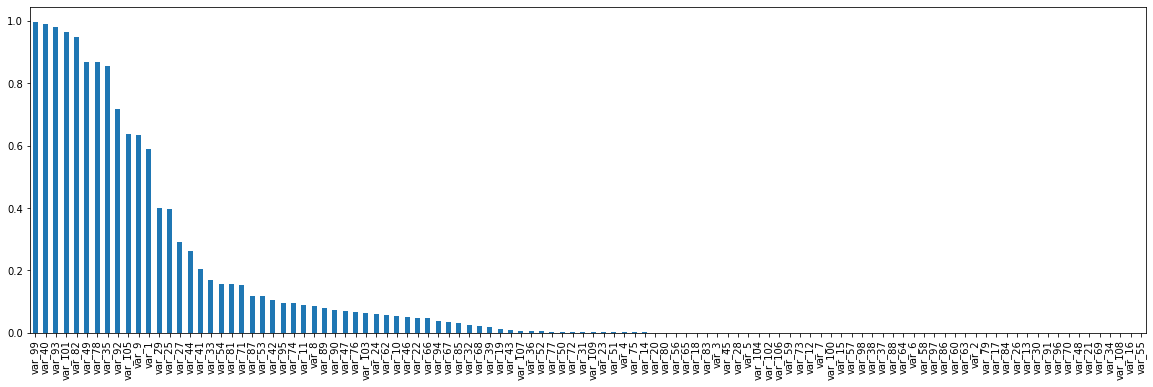

In [148]:
# 1) let's capture the pvalues in a pandas series
# 2) add the variable names in the index
# 3) sort the features based on their anova pvalues
# 4) and make a var plot

univariate = pd.Series(univariate[1])
univariate.index = X_train.columns
univariate.sort_values(ascending=False).plot.bar(figsize=(20, 6))

The smaller the p_value the more predictive the feature is.

Features on the left of the plot are very bad at predicting the target. The most predictive features are on the right of the plot.

**How can we select features based on the anova p-values?**

There are a few ways in which this can be done:

- Select top k features, where k is an arbitrary number of features

- Select features in the top n percentile, where n is again an arbitrary number

- Select all features below a certain threshold, arbitrarily decided.

Scikit-learn transformer **SelectKBest**, allows us to automatically select the top k features, based of any statistical value, including Anova. It will select those with the lowest pvalues.

Sklearn's **SelectPercentile** allows us to select the features in the top percentile of any statistical value, including the anova.

Alternatively, if we want to select features based on a pvalue threshold, we can do it manually.

### Select top 10 features based of univariate anova

In [149]:
# select the top 10 features
sel_ = SelectKBest(f_classif, k=10).fit(X_train, y_train)

# display selected feature names
X_train.columns[sel_.get_support()]

Index(['var_16', 'var_21', 'var_34', 'var_48', 'var_55', 'var_69', 'var_70',
       'var_91', 'var_96', 'var_108'],
      dtype='object')

In [150]:
# remove unwanted features from the dataset

X_train = sel_.transform(X_train)

X_train.shape

(35000, 10)

## Regression

In [151]:
data = read_df_from_file ( "housing_prices_train.csv", set_nrows=False, nrws=0 ) 
data.shape

Full path NM exists  C:\Users\Arindam Banerji\CopyFolder\IOT_thoughts\python-projects\kaggle_experiments\input_data\housing_prices_train.csv


(1460, 81)

In [152]:
# In practice, feature selection should be done after data pre-processing,
# so ideally, all the categorical variables are encoded into numbers,
# and then you can assess how deterministic they are of the target

# here for simplicity I will use only numerical variables
# select numerical columns:

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape

(1460, 38)

In [153]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['SalePrice'], axis=1),
    data['SalePrice'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((1022, 37), (438, 37))

## Univariate Anova

<AxesSubplot:>

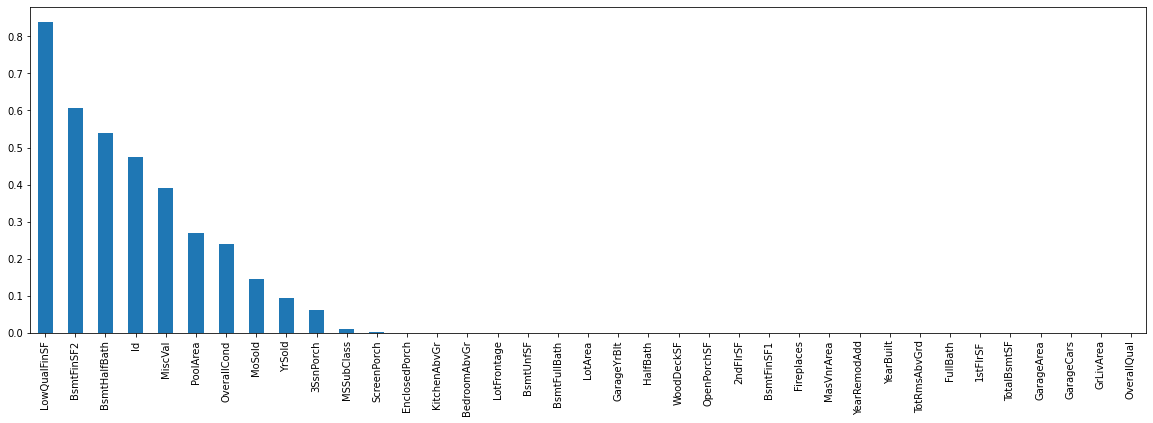

In [154]:
# univariate anova
univariate = f_regression(X_train.fillna(0), y_train)

# plot values
univariate = pd.Series(univariate[1])
univariate.index = X_train.columns
univariate.sort_values(ascending=False).plot.bar(figsize=(20,6))

### Select features in top 10th percentile

In [155]:
# select features in top 10th percentile
sel_ = SelectPercentile(f_regression,
                        percentile=10).fit(X_train.fillna(0), y_train)

# display selected feature names
X_train.columns[sel_.get_support()]

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea'], dtype='object')

In [156]:
# select features / discard unwanted features

X_train = sel_.transform(X_train.fillna(0))
X_train.shape

(1022, 4)

## Filter Methods - Basics - Plus - Filter statistical tests

### Putting it all together

In [157]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import (
    VarianceThreshold,
    f_classif,
    SelectKBest,
)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# setting path
sys.path.append('..')

# importing
from helper_fe_v2 import (
    get_full_datapath_nm,
    read_df_from_file,
    check_module_members
)

In [158]:
# load the Santander customer satisfaction dataset from Kaggle

data = read_df_from_file ( "fselect_dataset_1.csv", set_nrows=False, nrws=0 ) 
data.shape

Full path NM exists  C:\Users\Arindam Banerji\CopyFolder\IOT_thoughts\python-projects\kaggle_experiments\input_data\fselect_dataset_1.csv


(50000, 301)

In [159]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),
    data['target'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((35000, 300), (15000, 300))

In [160]:
# I keep a copy of the dataset with all the variables
# to compare the performance of machine learning models
# at the end of the notebook

X_train_original = X_train.copy()
X_test_original = X_test.copy()

## Remove constant features

In [161]:
constant_features = [
    feat for feat in X_train.columns if X_train[feat].std() == 0
]

X_train.drop(labels=constant_features, axis=1, inplace=True)
X_test.drop(labels=constant_features, axis=1, inplace=True)

X_train.shape, X_test.shape

((35000, 266), (15000, 266))

In [162]:
# Remove quasi constant features

sel = VarianceThreshold(threshold=0.01)

sel.fit(X_train) # finds the features with low variance

sum(sel.get_support()) # how many not quasi-constant?

215

In [163]:
# previously, we captured the feature names like this:

features_to_keep = X_train.columns[sel.get_support()]

len(features_to_keep)

215

In [164]:
# now, we can also capture them like this:

features_to_keep = sel.get_feature_names_out()

len(features_to_keep)

215

In [165]:
# remove the features

X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train.shape, X_test.shape

((35000, 215), (15000, 215))

In [166]:
# sklearn transformations lead to numpy arrays
# here I transform the arrays back to dataframes

X_train= pd.DataFrame(X_train)
X_train.columns = features_to_keep

X_test= pd.DataFrame(X_test)
X_test.columns = features_to_keep

In [167]:
# check for duplicated features in the training set

duplicated_feat = []
for i in range(0, len(X_train.columns)):
    if i % 10 == 0:  # this helps me understand how the loop is going
        print(i)

    col_1 = X_train.columns[i]

    for col_2 in X_train.columns[i + 1:]:
        if X_train[col_1].equals(X_train[col_2]):
            duplicated_feat.append(col_2)
            
len(duplicated_feat)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210


10

In [168]:
# remove duplicated features
X_train.drop(labels=duplicated_feat, axis=1, inplace=True)
X_test.drop(labels=duplicated_feat, axis=1, inplace=True)

X_train.shape, X_test.shape

((35000, 205), (15000, 205))

In [169]:
# I keep a copy of the dataset except constant and duplicated variables
# to measure the performance of machine learning models
# at the end of the notebook

X_train_basic_filter = X_train.copy()
X_test_basic_filter = X_test.copy()

## Remove co-related features

In [170]:
# find and remove correlated features
def correlation(dataset, threshold):
    
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            # we are interested in absolute coeff value
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    
    return col_corr


corr_features = correlation(X_train, 0.8)
print('correlated features: ', len(set(corr_features)))

correlated features:  93


In [171]:
# remove correlated features

X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)

X_train.shape, X_test.shape

((35000, 112), (15000, 112))

In [172]:
# keep a copy of the dataset at  this stage

X_train_corr = X_train.copy()
X_test_corr = X_test.copy()

### Select features based of anova

In [173]:
sel_ = SelectKBest(f_classif, k=20).fit(X_train, y_train)

# capture selected feature names
features_to_keep = X_train.columns[sel_.get_support()]

# or
features_to_keep = sel_.get_feature_names_out()

# ============

# select features
X_train_anova = sel_.transform(X_train)
X_test_anova = sel_.transform(X_test)

# numpy array to dataframe
X_train_anova = pd.DataFrame(X_train_anova)
X_train_anova.columns = features_to_keep

X_test_anova = pd.DataFrame(X_test_anova)
X_test_anova.columns = features_to_keep

X_train_anova.shape, X_test_anova.shape

((35000, 20), (15000, 20))

### Compare the performance in machine learning algorithms

In [174]:
# create a function to build random forests and
# compare its performance in train and test sets


def run_randomForests(X_train, X_test, y_train, y_test):

    rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
    rf.fit(X_train, y_train)

    print('Train set')
    pred = rf.predict_proba(X_train)
    print(
        'Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:, 1])))

    print('Test set')
    pred = rf.predict_proba(X_test)
    print(
        'Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))

In [175]:
# original
run_randomForests(X_train_original,
                  X_test_original,
                  y_train, y_test)

Train set
Random Forests roc-auc: 0.807612232524249
Test set
Random Forests roc-auc: 0.7868832427636059


In [176]:
# filter methods - basic
run_randomForests(X_train_basic_filter,
                  X_test_basic_filter,
                  y_train, y_test)

Train set
Random Forests roc-auc: 0.810290026780428
Test set
Random Forests roc-auc: 0.7914020645941601


In [177]:
# filter methods - correlation
run_randomForests(X_train_corr,
                  X_test_corr,
                  y_train, y_test)

Train set
Random Forests roc-auc: 0.8066004772684517
Test set
Random Forests roc-auc: 0.7859521124929707


In [178]:
# filter methods - univariate roc-auc
run_randomForests(X_train_anova,
                  X_test_anova,
                  y_train, y_test)

Train set
Random Forests roc-auc: 0.8181634778452822
Test set
Random Forests roc-auc: 0.7994720109870546


In [179]:
# create a function to build logistic regression
# and compare its performance in train and test sets


def run_logistic(X_train, X_test, y_train, y_test):

    scaler = StandardScaler().fit(X_train)

    # function to train and test the performance of logistic regression
    logit = LogisticRegression(
        penalty='l1', random_state=44, max_iter=1000, solver='liblinear')
    
    # fit
    logit.fit(scaler.transform(X_train), y_train)

    print('Train set')
    pred = logit.predict_proba(scaler.transform(X_train))
    print(
        'Logistic Regression roc-auc: {}'.format(roc_auc_score(y_train, pred[:, 1])))

    print('Test set')
    pred = logit.predict_proba(scaler.transform(X_test))
    print(
        'Logistic Regression roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))

In [180]:
# original
run_logistic(X_train_original,
             X_test_original,
             y_train, y_test)

Train set
Logistic Regression roc-auc: 0.8022197599721129
Test set
Logistic Regression roc-auc: 0.795929816232469


In [181]:
# filter methods - basic

run_logistic(X_train_basic_filter,
             X_test_basic_filter,
             y_train, y_test)

Train set
Logistic Regression roc-auc: 0.801572922199813
Test set
Logistic Regression roc-auc: 0.7956276722308412


In [182]:
# filter methods - correlation

run_logistic(X_train_corr,
             X_test_corr,
             y_train, y_test)

Train set
Logistic Regression roc-auc: 0.7938745217286656
Test set
Logistic Regression roc-auc: 0.7882478643347434


In [183]:
# filter methods - univariate anova

run_logistic(X_train_anova,
             X_test_anova,
             y_train, y_test)

Train set
Logistic Regression roc-auc: 0.7827245834924114
Test set
Logistic Regression roc-auc: 0.7720492495853009


As we see, the 20 features we selected using the univariate anova are doing a good job, as the final model does not show a big decrease in performance compared to that one using all features.

Why don't you try to apply the univariate anova without removing features by correlation, to see if the selected features are good enough?

That is all for this lecture. I hope you enjoyed it!

In [184]:
from scipy.stats import chi2_contingency, chisquare, chi2

In [185]:
chisquare(np.array([100, 100, 50, 50]), np.array([100, 100, 50, 50]), ddof=2)

Power_divergenceResult(statistic=0.0, pvalue=1.0)

In [186]:
chisquare(np.array([95, 105, 45, 55]), np.array([100, 100, 50, 50]), ddof=2)

Power_divergenceResult(statistic=1.5, pvalue=0.22067136191984324)

In [187]:
chisquare(np.array([120, 90, 30, 60]), np.array([100, 100, 50, 50]), ddof=2)

Power_divergenceResult(statistic=15.0, pvalue=0.00010751117672950066)

In [188]:
chisquare(np.array([150, 100, 20, 30]), np.array([100, 100, 50, 50]), ddof=2)

Power_divergenceResult(statistic=51.0, pvalue=9.236596617173982e-13)

Text(0, 0.5, 'Probability')

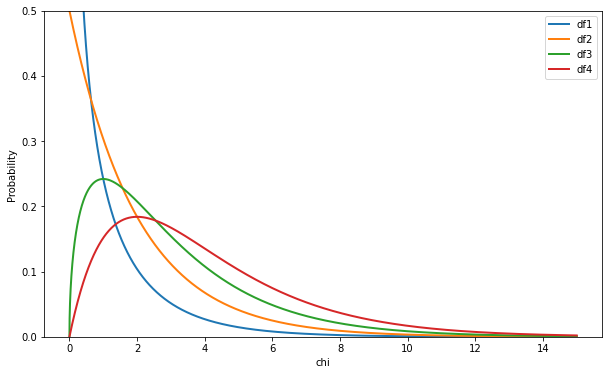

In [189]:
#x-axis ranges from 0 to 20 with .001 steps
x = np.arange(0, 15, 0.001)

# change the figure size
plt.figure(figsize=(10,6))

#plot Chi-square distribution with 4 degrees of freedom
plt.plot(x, chi2.pdf(x, df=1), linewidth=2)
plt.plot(x, chi2.pdf(x, df=2), linewidth=2)
plt.plot(x, chi2.pdf(x, df=3), linewidth=2)
plt.plot(x, chi2.pdf(x, df=4), linewidth=2)
plt.legend(['df1', 'df2', 'df3', 'df4'])
plt.ylim(0, 0.5)
plt.xlabel("chi")
plt.ylabel('Probability')

Text(0, 0.5, 'Probability')

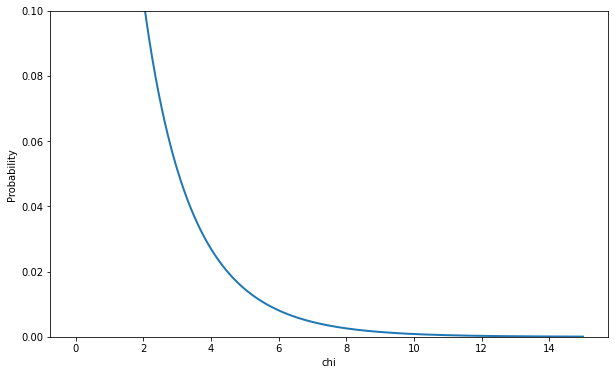

In [190]:
# x-axis ranges from 0 to 20 with .001 steps
x = np.arange(0, 15, 0.001)

# change the figure size
plt.figure(figsize=(10,6))

#plot Chi-square distribution with 4 degrees of freedom
plt.plot(x, chi2.pdf(x, df=1), linewidth=2)
plt.ylim(0, 0.1)
plt.xlabel("chi")
plt.ylabel('Probability')

In [191]:
# cats and dogs 

obs = np.array([200, 60, 100, 10]).reshape([2,2])
obs

array([[200,  60],
       [100,  10]])

In [192]:
(200-210.81081081)**2/210.81081081

0.554400554319526

In [193]:
(60-49.18918919)**2/49.18918919

2.3760023756068103

In [194]:
(100-89.18918919)**2/89.18918919

1.3104013101928391

In [195]:
(10-20.81081081)**2/20.81081081

5.61600561538202

In [196]:
(200-210.8)**2/210.8 + (60-49.19)**2/49.19 + (100-89.19)**2/89.19 +(10-20.81)**2/20.81

9.854502388371507

In [197]:
chi2_contingency(obs)

(8.966139277389278,
 0.002750291444072208,
 1,
 array([[210.81081081,  49.18918919],
        [ 89.18918919,  20.81081081]]))